In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [14]:
# Load Data directly from relative path
# (Assuming you are in notebooks/, data is one level up)
df = pd.read_csv("../data/raw/predictive_maintenance.csv")

In [15]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [16]:
rows = df.shape[0]
columns = df.shape[1] 
print(f"number of rows : {rows}")
print(f"number of columns : {columns}")

number of rows : 10000
number of columns : 14


In [17]:
# Rename columns to snake_case
df.columns = [
    col.replace('[K]', '')
       .replace('[rpm]', '')
       .replace('[Nm]', '')
       .replace('[min]', '')
       .strip()
       .replace(' ', '_')
       .lower() 
    for col in df.columns
]

# Drop ID columns (not useful for EDA)
df_eda = df.drop(columns=['udi', 'product_id'])
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   type                 10000 non-null  object 
 1   air_temperature      10000 non-null  float64
 2   process_temperature  10000 non-null  float64
 3   rotational_speed     10000 non-null  int64  
 4   torque               10000 non-null  float64
 5   tool_wear            10000 non-null  int64  
 6   machine_failure      10000 non-null  int64  
 7   twf                  10000 non-null  int64  
 8   hdf                  10000 non-null  int64  
 9   pwf                  10000 non-null  int64  
 10  osf                  10000 non-null  int64  
 11  rnf                  10000 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 937.6+ KB


In [18]:
df_eda.describe()

,air_temperature,process_temperature,rotational_speed,torque,tool_wear,machine_failure,twf,hdf,pwf,osf,rnf
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


Class 0: 9661 (96.61%)
Class 1: 339 (3.39%)


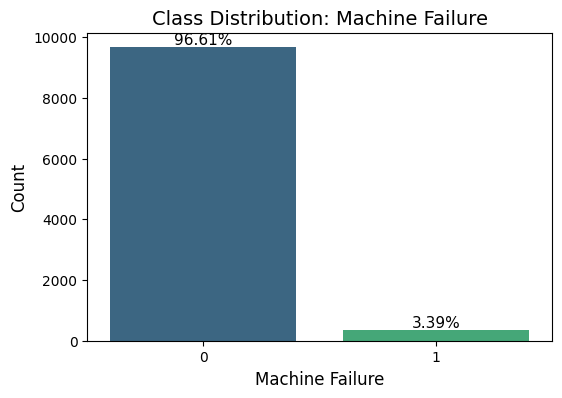

In [21]:
# Calculate counts and percentages
counts = df_eda['machine_failure'].value_counts().sort_index()
percentage = counts / len(df_eda) * 100

# Print dynamically
for cls in counts.index:
    print(f"Class {cls}: {counts[cls]} ({percentage[cls]:.2f}%)")

# Plot
plt.figure(figsize=(6,4))

# Updated seaborn syntax to avoid FutureWarning
ax = sns.countplot(x='machine_failure', data=df_eda, hue='machine_failure', dodge=False, palette='viridis', legend=False)

# Remove the redundant legend
ax.legend_.remove() if ax.legend_ else None

# Add percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    pct = height / len(df_eda) * 100
    ax.annotate(f'{pct:.2f}%', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=11, color='black')

plt.title("Class Distribution: Machine Failure", fontsize=14)
plt.xlabel("Machine Failure", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()

Failure counts by type:
hdf    115
osf     98
pwf     95
twf     46
rnf     19
dtype: int64


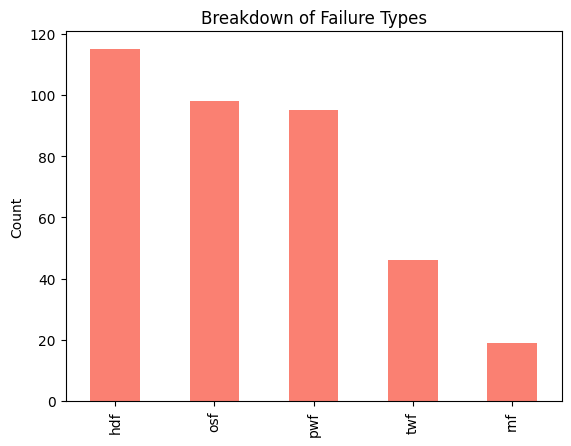

In [22]:
# The specific failure columns
failure_cols = ['twf', 'hdf', 'pwf', 'osf', 'rnf']

# Sum up failures for each type
failure_counts = df_eda[failure_cols].sum().sort_values(ascending=False)

print("Failure counts by type:")
print(failure_counts)

# Plot
failure_counts.plot(kind='bar', color='salmon')
plt.title("Breakdown of Failure Types")
plt.ylabel("Count")
plt.show()

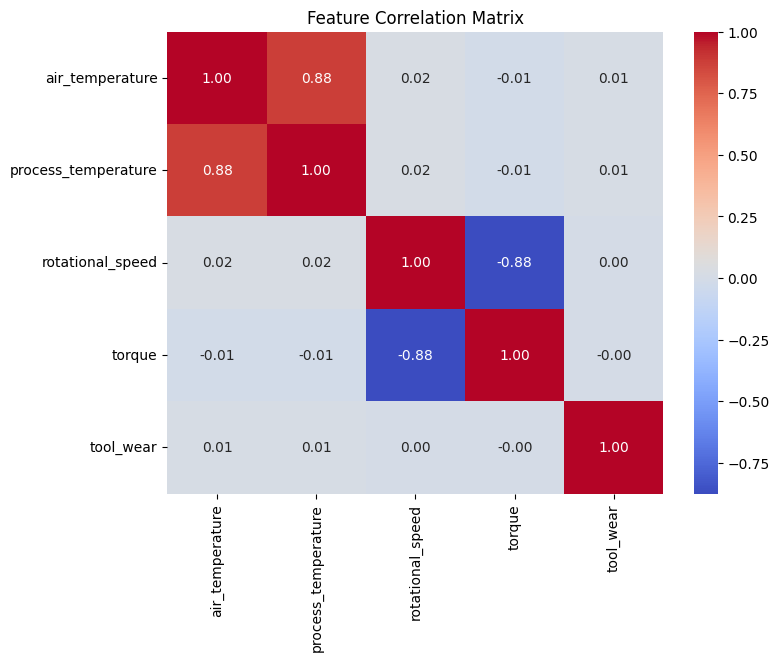

In [23]:
# Filter only numerical columns
numerical_cols = ['air_temperature', 'process_temperature', 'rotational_speed', 'torque', 'tool_wear']
corr = df_eda[numerical_cols].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

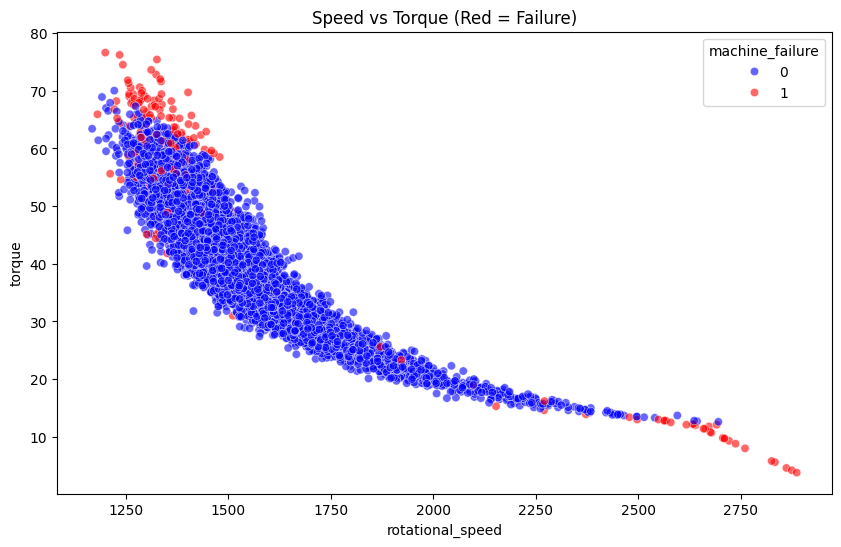

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_eda, 
    x='rotational_speed', 
    y='torque', 
    hue='machine_failure', 
    alpha=0.6,
    palette={0: 'blue', 1: 'red'}
)
plt.title("Speed vs Torque (Red = Failure)")
plt.show()

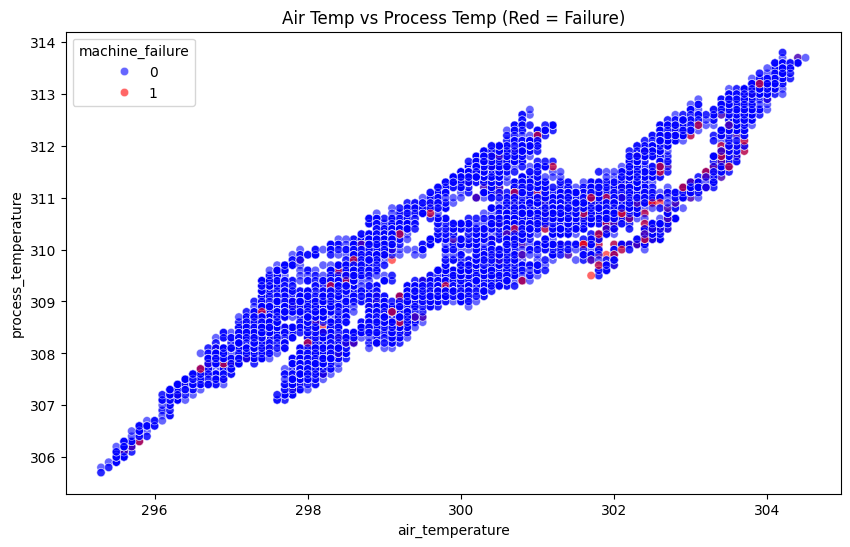

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_eda, 
    x='air_temperature', 
    y='process_temperature', 
    hue='machine_failure', 
    alpha=0.6,
    palette={0: 'blue', 1: 'red'}
)
plt.title("Air Temp vs Process Temp (Red = Failure)")
plt.show()

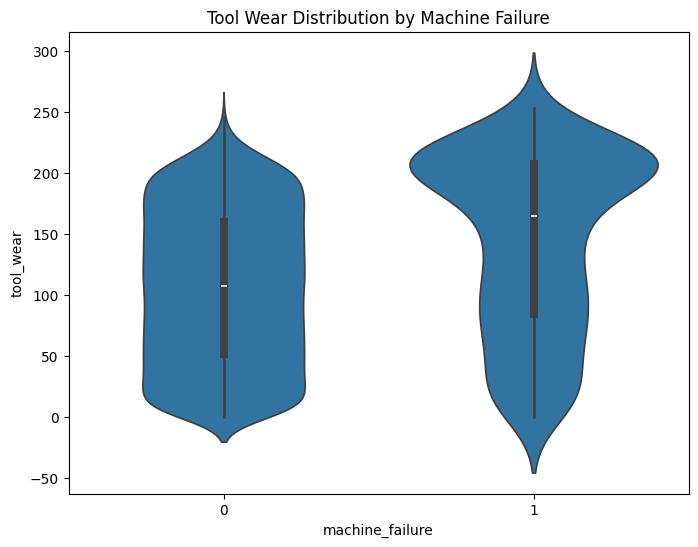

In [33]:
plt.figure(figsize=(8,6))
sns.violinplot(x='machine_failure', y='tool_wear', data=df_eda)
plt.title("Tool Wear Distribution by Machine Failure")
plt.show()

type
L    6000
M    2997
H    1003
Name: count, dtype: int64


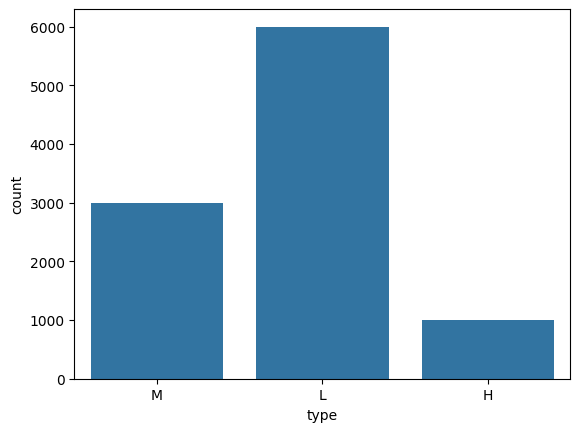

In [31]:
col='type'
print(df_eda[col].value_counts())
sns.countplot(x=col, data=df_eda)
plt.show()